## Scale and shape simulation

Related to this image.sc question https://forum.image.sc/t/focal-adhesion-segmentation-with-stardist/98346

Main issue is that in some images structure of interest is circular and in some it is elongated.

### Question - can we find different scales and different object shapes using deep learning ?

To answer that let's do a simulation

1.  Goal is not to create a model that is biologically relevant. 
2.  Goal is to test the behavior of networks on objects of different scales and shapes. 
3.  Goal is to test that the network(s) are wired right.
4.  If the simulation works move on to biological images. 

In [68]:
from tnia.deconvolution import psfs
from tnia.deconvolution import forward
from tnia.plotting.plt_helper import imshow_multi2d
from pathlib import Path
import os

tnia_images_path = Path(r'D:/images')
parent_path=Path(tnia_images_path / r'tnia-python-images\imagesc\2024_07_03_dl_scale_shape')

if not os.path.exists(parent_path):
    os.makedirs(parent_path)

simulation_path = Path(parent_path / 'simulation')

if not os.path.exists(simulation_path):
    os.makedirs(simulation_path)

In [62]:
import napari
import numpy as np

background = np.zeros((1024, 1024), 'uint16')
background[:,:]=100
truth = np.empty((1024, 1024), 'uint16')

viewer = napari.Viewer()
viewer.add_image(background, name='background')
viewer.add_labels(truth, name='truth')

<Labels layer 'truth' at 0x1e38852d610>

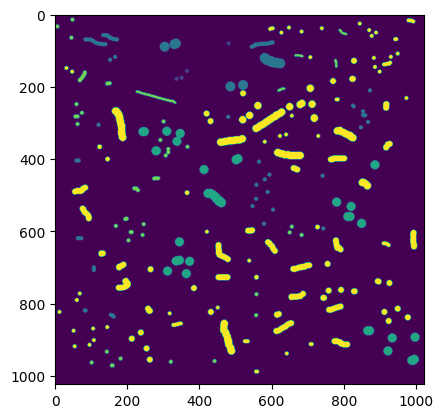

In [63]:
import matplotlib.pyplot as plt
plt.imshow(truth)

1.0
0 5


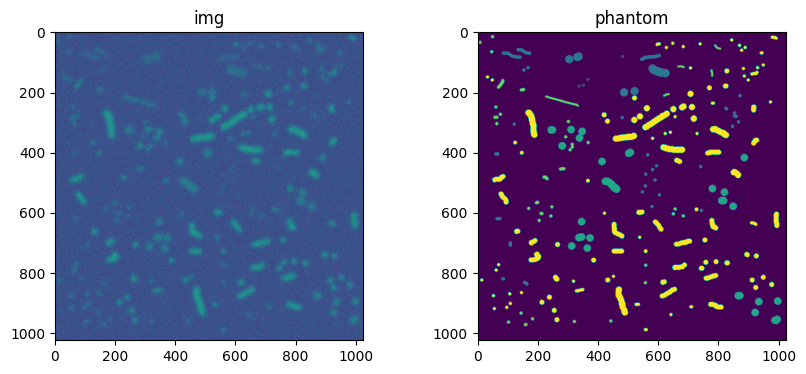

In [64]:
from tnia.deconvolution.gaussian_psf import gaussian_2d

psf = gaussian_2d(100, 6)

print(psf.sum())
print(truth.min(), truth.max())
img = forward.forward(2.4*truth, psf, 10,True, True).astype(np.float32)
fig = imshow_multi2d([img, truth], ["img", "phantom"], 1, 2)



In [69]:
from skimage.io import imsave
imsave(parent_path / 'phantom3.tif', img)
imsave(simulation_path / 'phantom3.tif', truth)

C:\Users\bnort\AppData\Local\Temp\ipykernel_25784\4208712150.py:3: UserWarning: D:\images\tnia-python-images\imagesc\2024_07_03_dl_scale_shape\simulation\phantom3.tif is a low contrast image
  imsave(simulation_path / 'phantom3.tif', truth)


In [40]:
viewer = napari.Viewer()
viewer.add_image(img, name='img')
viewer.add_image(truth, name='truth')

<Image layer 'truth' at 0x1e390695730>